<a href="https://colab.research.google.com/github/Parisa-Hatami/YapAiTekAssessment/blob/master/YapAiTekAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install keras==2.1.0

     |████████████████████████████████| 307kB 2.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.0 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


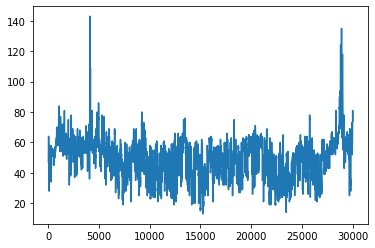

In [5]:
#plot dataset
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/My Drive/psi_df_2016_2019.csv', usecols=['national'])
plt.plot(dataset)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# load the dataset
dataframe = pd.read_csv('/content/drive/My Drive/psi_df_2016_2019.csv', usecols=['national'])
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [53]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

21015 9007


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

regressor = Sequential()
regressor.add(LSTM(4, input_shape=(1, look_back)))
# regressor.add(Dropout(0.2))
regressor.add(Dense(1))

regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

regressor.fit(trainX, trainY, epochs=5, batch_size=1, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
21013/21013 [==============================] - 130s 6ms/step - loss: 4.4497e-04
Epoch 2/5
21013/21013 [==============================] - 128s 6ms/step - loss: 9.1932e-05
Epoch 3/5
21013/21013 [==============================] - 129s 6ms/step - loss: 9.1575e-05
Epoch 4/5
21013/21013 [==============================] - 129s 6ms/step - loss: 9.0957e-05
Epoch 5/5
21013/21013 [==============================] - 129s 6ms/step - loss: 9.0178e-05


In [47]:
#There are four bands on the PM2.5 concentration scale: 0 to 55 for normal, 56 to 150 for elevated, 151 to 250 for high, and very high for any higher readings

# testPredict = regressor.predict(testX)
normal = []
elevated = []
high = []
very_high = []

# testPredict = scaler.inverse_transform(testPredict)

for i in range(len(testPredict)):
    if 0 <= testPredict[i] <= 55:
       print(i,',',testPredict[i], '= normal')
       normal.append(i)

    if 56 <= testPredict[i] <= 150:
       print(i,',',testPredict[i], '= elevated')
       elevated.append(i)

    if 151 <= testPredict[i] <= 250:
       print(i,',',testPredict[i], '= high')
       high.append(i)

    if testPredict[i] >= 251:
       print(i,',',testPredict[i], '= very high') 
       very_high.append(i) 

Streaming output truncated to the last 5000 lines.
3795 , [46.18904] = normal
3796 , [42.224617] = normal
3797 , [40.24503] = normal
3798 , [38.26746] = normal
3799 , [37.27951] = normal
3800 , [36.292152] = normal
3801 , [35.305424] = normal
3802 , [36.292152] = normal
3803 , [36.292152] = normal
3804 , [35.305424] = normal
3805 , [36.292152] = normal
3806 , [35.305424] = normal
3807 , [35.305424] = normal
3808 , [35.305424] = normal
3809 , [35.305424] = normal
3810 , [36.292152] = normal
3811 , [37.27951] = normal
3812 , [39.255974] = normal
3813 , [39.255974] = normal
3814 , [39.255974] = normal
3815 , [38.26746] = normal
3816 , [39.255974] = normal
3817 , [41.23458] = normal
3818 , [44.20602] = normal
3819 , [49.166176] = normal
3820 , [51.152435] = normal
3821 , [52.14596] = normal
3822 , [53.13973] = normal
3824 , [56.12231] = elevated
3825 , [56.12231] = elevated
3826 , [57.1169] = elevated
3827 , [57.1169] = elevated
3828 , [57.1169] = elevated
3829 , [58.111656] = elevated
383

In [48]:
print('normal = ', len(normal), 'elevated = ', len(elevated), 'high = ', len(high), 'very high = ', len(very_high))

normal =  5769 elevated =  2928 high =  0 very high =  0


In [57]:
# make predictions
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.15 RMSE
Test Score: 1.14 RMSE


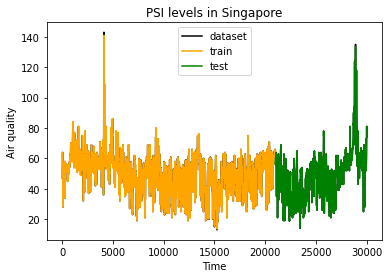

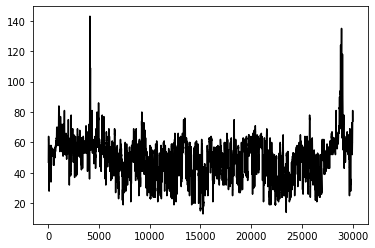

In [58]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color = 'black', label = 'dataset')
plt.plot(trainPredictPlot, color = 'orange', label = 'train')
plt.plot(testPredictPlot, color = 'green', label = 'test')
plt.title('PSI levels in Singapore')
plt.xlabel('Time')
plt.ylabel('Air quality')
plt.legend()
plt.show()
plt.plot(scaler.inverse_transform(dataset), color = 'black')
plt.show()